In [1]:
# Edwin Peter
# epeter@itam.mx

# Importing the libraries
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('regLin.csv')
X = dataset[dataset.columns[0:-1]]
Y = dataset[dataset.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75)


In [2]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

print(regressor.intercept_, regressor.coef_)

(2.5027626754217387, array([ 0.60611022]))


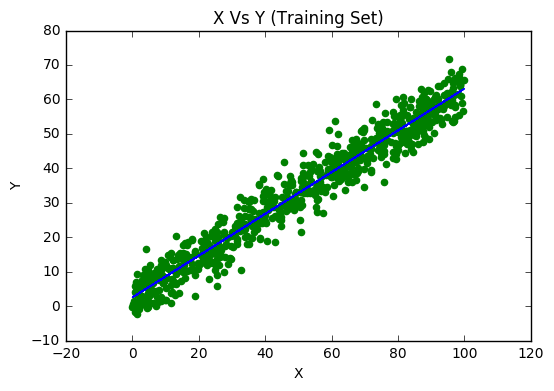

In [116]:
#Training Set Regression
plt.scatter(X_train, Y_train, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('X Vs Y (Training Set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

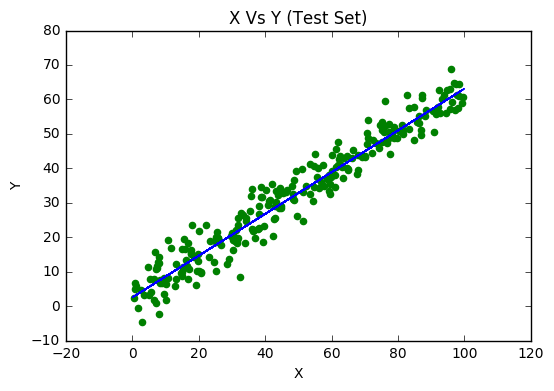

In [118]:
#Test Set Regression
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('X Vs Y (Test Set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
np.mean(regressor.predict(X_test) - Y_test) **2

0.00347230389239127

In [6]:
print(regressor.intercept_)
print(regressor.coef_)

2.60754235898
[ 0.60533382]


In [113]:
w = np.linspace(-regressor.intercept_, regressor.intercept_ * 3, num=100)

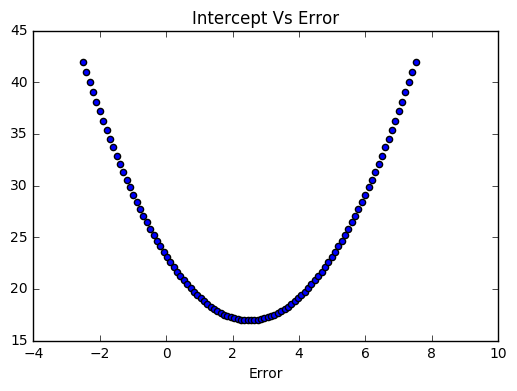

In [112]:
m = regressor.coef_[0]
b = regressor.intercept_

def computeErrorForLineGivenPoints(b, m, X,Y):
    indices = X.index.values
    totalError = 0
    for i in range(0, len(indices)):
        index = indices[i]
        x = X['X'][index]
        y = Y[index]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(X))

df = pd.DataFrame()

for i in range(0, len(w)):
    x = computeErrorForLineGivenPoints(w[i], m, X_train, Y_train)
    df = df.append({'int': w[i], 'error': x}, ignore_index=True)
    


plt.scatter(df['int'], df['error'])
plt.title('Intercept Vs Error')
plt.xlabel('Error')
plt.ylabel('')
plt.show()